<a href="https://colab.research.google.com/github/yiseeun/yiseeun/blob/main/%EA%B0%84%EB%8B%A8%ED%95%9C_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Url_B_heart="https://raw.githubusercontent.com/yiseeun/yiseeun/f3e3933c94da7804fef47cbe805285e9e0773ed1/heart.csv"

df = pd.read_csv(Url_B_heart)

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail(n=10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 2)

data_filled = imputer.fit_transform(df.iloc[:,1:])
print(type(data_filled))

pd.DataFrame(data_filled)

<class 'numpy.ndarray'>


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
300,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0


In [ ]:
y_original = df['target']

In [ ]:
y_original.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
y_original.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

In [ ]:
y_original.unique()

array([1, 0])

In [ ]:
y_original.value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
y_original_2=pd.get_dummies(y_original)

y_original_2.head()

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,1:], y_original_2[0],stratify=y_original_2[0], random_state=3)

In [ ]:
X_train.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
38,0,2,155,269,0,1,148,0,0.8,2,0,2,1
48,0,2,128,216,0,0,115,0,0.0,2,0,0,1
258,0,0,150,244,0,1,154,1,1.4,1,0,2,0
266,0,0,180,327,0,2,117,1,3.4,1,0,2,0
244,1,0,132,184,0,0,105,1,2.1,1,1,1,0


In [ ]:
std = StandardScaler()

std.fit(X_train.iloc[:,0:])

X_train.iloc[:,0:]= std.transform(X_train.iloc[:,0:])

X_train.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
38,-1.497617,1.038216,1.319598,0.425629,-0.390236,0.876003,-0.070143,-0.688495,-0.219886,0.951318,-0.706293,-0.505828,0.911397
48,-1.497617,1.038216,-0.201526,-0.592209,-0.390236,-0.999966,-1.467602,-0.688495,-0.917985,0.951318,-0.706293,-3.740280,0.911397
258,-1.497617,-0.950603,1.037909,-0.054483,-0.390236,0.876003,0.183940,1.452442,0.303689,-0.648305,-0.706293,-0.505828,-1.097216
266,-1.497617,-0.950603,2.728047,1.539489,-0.390236,2.751972,-1.382907,1.452442,2.048936,-0.648305,-0.706293,-0.505828,-1.097216
244,0.667727,-0.950603,0.023826,-1.206753,-0.390236,-0.999966,-1.891074,1.452442,0.914525,-0.648305,0.271320,-2.123054,-1.097216


In [ ]:
X_train.describe()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,227.000000
mean,-5.086484e-17,-3.423595e-17,2.347608e-17,-3.912680e-17,-3.912680e-18,-3.912680e-18,7.825361e-18,-1.565072e-17,-2.738876e-17,7.825361e-18,5.086484e-17,4.695216e-17,0.000000
std,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210
min,-1.497617e+00,-9.506030e-01,-2.117016e+00,-2.320613e+00,-3.902362e-01,-9.999659e-01,-3.330879e+00,-6.884954e-01,-9.179850e-01,-2.247929e+00,-7.062932e-01,-3.740280e+00,-1.097216
25%,-1.497617e+00,-9.506030e-01,-6.522296e-01,-6.882314e-01,-3.902362e-01,-9.999659e-01,-6.418309e-01,-6.884954e-01,-9.179850e-01,-6.483054e-01,-7.062932e-01,-5.058284e-01,-1.097216
50%,6.677274e-01,4.380659e-02,-8.885015e-02,-5.448322e-02,-3.902362e-01,8.760031e-01,9.924547e-02,-6.884954e-01,-2.198859e-01,-6.483054e-01,-7.062932e-01,-5.058284e-01,0.911397
75%,6.677274e-01,1.038216e+00,4.745293e-01,5.408560e-01,-3.902362e-01,8.760031e-01,6.921065e-01,1.452442e+00,6.527381e-01,9.513178e-01,2.713199e-01,1.111398e+00,0.911397
max,6.677274e-01,2.032626e+00,3.854806e+00,6.090954e+00,2.562551e+00,2.751972e+00,2.216606e+00,1.452442e+00,4.492283e+00,9.513178e-01,3.204159e+00,1.111398e+00,0.911397


In [ ]:
X_test.iloc[:,0:]= std.transform(X_test.iloc[:,0:])

In [ ]:
X_test.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
242,1.000000e+00,6.847190e-17,145.0,212.0,2.191101e-16,1.643326e-16,132.0,3.130144e-17,2.000000e+00,1.0,2.000000e+00,1.0,2.660623e-16
275,1.000000e+00,6.847190e-17,125.0,212.0,2.191101e-16,1.000000e+00,168.0,3.130144e-17,1.000000e+00,2.0,2.000000e+00,3.0,2.660623e-16
131,2.034594e-16,1.000000e+00,134.0,271.0,2.191101e-16,1.000000e+00,162.0,3.130144e-17,7.042824e-17,1.0,-8.607897e-17,2.0,1.000000e+00
296,2.034594e-16,6.847190e-17,124.0,197.0,2.191101e-16,1.000000e+00,136.0,1.000000e+00,7.042824e-17,1.0,-8.607897e-17,2.0,2.660623e-16
237,1.000000e+00,6.847190e-17,140.0,293.0,2.191101e-16,1.643326e-16,170.0,3.130144e-17,1.200000e+00,1.0,2.000000e+00,3.0,2.660623e-16


In [ ]:
X_test.describe()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7.600000e+01,7.600000e+01,76.000000,76.000000,7.600000e+01,7.600000e+01,76.000000,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,76.000000,7.600000e+01
mean,6.578947e-01,1.000000e+00,131.763158,244.552632,1.973684e-01,5.131579e-01,149.618421,3.421053e-01,1.002632e+00,1.381579e+00,7.500000e-01,2.315789,5.394737e-01
std,4.775669e-01,1.107550e+00,16.879864,51.057456,4.006574e-01,5.031480e-01,20.610656,4.775669e-01,1.204876e+00,5.880387e-01,1.021437e+00,0.593532,5.017513e-01
min,2.034594e-16,6.847190e-17,100.000000,160.000000,2.191101e-16,1.643326e-16,97.000000,3.130144e-17,7.042824e-17,1.173804e-16,-8.607897e-17,1.000000,2.660623e-16
25%,2.034594e-16,6.847190e-17,120.000000,211.000000,2.191101e-16,1.643326e-16,133.500000,3.130144e-17,7.042824e-17,1.000000e+00,-8.607897e-17,2.000000,2.660623e-16
50%,1.000000e+00,5.000000e-01,130.000000,234.000000,2.191101e-16,1.000000e+00,154.000000,3.130144e-17,6.000000e-01,1.000000e+00,-8.607897e-17,2.000000,1.000000e+00
75%,1.000000e+00,2.000000e+00,140.000000,271.500000,2.191101e-16,1.000000e+00,166.250000,1.000000e+00,1.525000e+00,2.000000e+00,1.000000e+00,3.000000,1.000000e+00
max,1.000000e+00,3.000000e+00,180.000000,417.000000,1.000000e+00,1.000000e+00,190.000000,1.000000e+00,5.600000e+00,2.000000e+00,4.000000e+00,3.000000,1.000000e+00


In [ ]:
y_train.describe()

count    227.000000
mean       0.453744
std        0.498956
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: 0, dtype: float64

In [ ]:
y_test.describe()

count    76.000000
mean      0.460526
std       0.501751
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: 0, dtype: float64

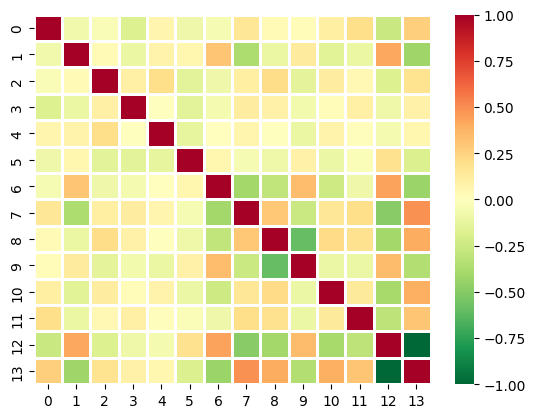

In [ ]:
df_cat = pd.concat([X_train,y_train], axis=1)

corr_mat=np.corrcoef(df_cat,rowvar=False)

sns.heatmap(corr_mat,linewidth=1,cmap='RdYlGn_r')
plt.show()

In [ ]:
df_cat.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,0
38,-1.497617,1.038216,1.319598,0.425629,-0.390236,0.876003,-0.070143,-0.688495,-0.219886,0.951318,-0.706293,-0.505828,0.911397,0
48,-1.497617,1.038216,-0.201526,-0.592209,-0.390236,-0.999966,-1.467602,-0.688495,-0.917985,0.951318,-0.706293,-3.740280,0.911397,0
258,-1.497617,-0.950603,1.037909,-0.054483,-0.390236,0.876003,0.183940,1.452442,0.303689,-0.648305,-0.706293,-0.505828,-1.097216,1
266,-1.497617,-0.950603,2.728047,1.539489,-0.390236,2.751972,-1.382907,1.452442,2.048936,-0.648305,-0.706293,-0.505828,-1.097216,1
244,0.667727,-0.950603,0.023826,-1.206753,-0.390236,-0.999966,-1.891074,1.452442,0.914525,-0.648305,0.271320,-2.123054,-1.097216,1


In [ ]:
X_train.shape

(227, 13)

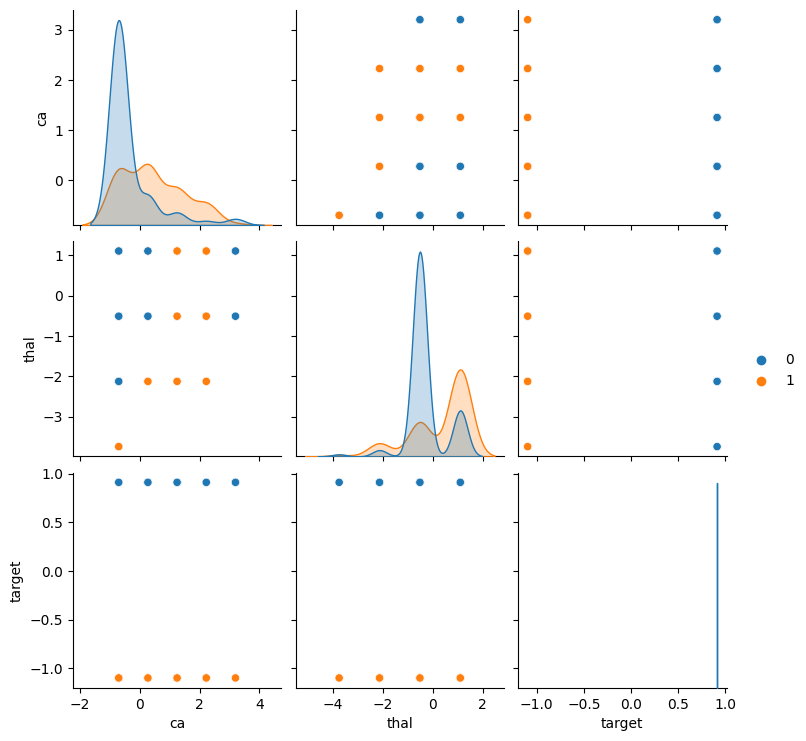

In [ ]:
sns.pairplot(df_cat.iloc[:,10:], hue=0);
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

historyA=model.fit(X_train, y_train, epochs=40, batch_size=16)

Epoch 1/40
15/15 [==============================] - 1s 4ms/step - loss: 0.8708 - binary_accuracy: 0.4537
Epoch 2/40
15/15 [==============================] - 0s 2ms/step - loss: 0.7540 - binary_accuracy: 0.4537
Epoch 3/40
15/15 [==============================] - 0s 3ms/step - loss: 0.6650 - binary_accuracy: 0.4846
Epoch 4/40
15/15 [==============================] - 0s 3ms/step - loss: 0.5980 - binary_accuracy: 0.8106
Epoch 5/40
15/15 [==============================] - 0s 2ms/step - loss: 0.5413 - binary_accuracy: 0.9604
Epoch 6/40
15/15 [==============================] - 0s 3ms/step - loss: 0.4928 - binary_accuracy: 0.9559
Epoch 7/40
15/15 [==============================] - 0s 2ms/step - loss: 0.4466 - binary_accuracy: 0.9471
Epoch 8/40
15/15 [==============================] - 0s 2ms/step - loss: 0.4008 - binary_accuracy: 0.9515
Epoch 9/40
15/15 [==============================] - 0s 3ms/step - loss: 0.3566 - binary_accuracy: 0.9515
Epoch 10/40
15/15 [==============================] - 0s

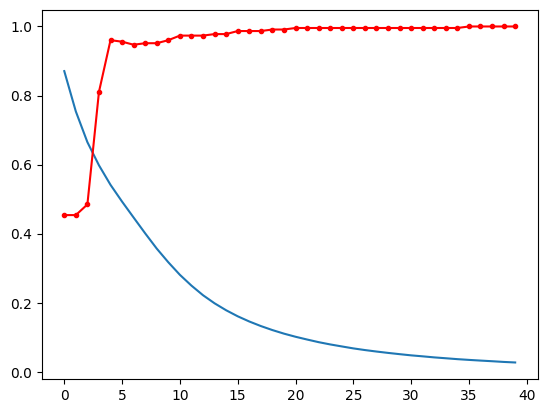

In [ ]:
y_loss = historyA.history['loss']
y_accu = historyA.history['binary_accuracy']

x_len = np.arange(len(y_loss))

plt.plot(x_len,y_loss)
plt.plot(x_len,y_accu, marker='.', c="red")

plt.show()

In [ ]:
A=X_test.iloc[3,0:].to_numpy()

In [ ]:
B=A.reshape(1, 13)

In [ ]:
model.predict(B,verbose=0)

array([[0.05703288]], dtype=float32)

In [ ]:
model.predict(X_test,verbose=0)[:10]

array([[0.02508245],
       [0.01061399],
       [0.01294298],
       [0.02283604],
       [0.01361056],
       [0.02137974],
       [0.0288144 ],
       [0.00825348],
       [0.01245003],
       [0.02133815]], dtype=float32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random

random.seed(5)

model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

history=model.fit(X_train, y_train, validation_split=0.25, epochs=40, batch_size=13, verbose=1)


Epoch 1/40
14/14 [==============================] - 1s 20ms/step - loss: 0.7878 - binary_accuracy: 0.5118 - val_loss: 0.6269 - val_binary_accuracy: 0.6491
Epoch 2/40
14/14 [==============================] - 0s 7ms/step - loss: 0.7261 - binary_accuracy: 0.5118 - val_loss: 0.5952 - val_binary_accuracy: 0.6491
Epoch 3/40
14/14 [==============================] - 0s 5ms/step - loss: 0.6718 - binary_accuracy: 0.5118 - val_loss: 0.5666 - val_binary_accuracy: 0.6491
Epoch 4/40
14/14 [==============================] - 0s 6ms/step - loss: 0.6274 - binary_accuracy: 0.5118 - val_loss: 0.5402 - val_binary_accuracy: 0.6842
Epoch 5/40
14/14 [==============================] - 0s 6ms/step - loss: 0.5860 - binary_accuracy: 0.6353 - val_loss: 0.5129 - val_binary_accuracy: 0.8772
Epoch 6/40
14/14 [==============================] - 0s 6ms/step - loss: 0.5503 - binary_accuracy: 0.7882 - val_loss: 0.4854 - val_binary_accuracy: 0.9649
Epoch 7/40
14/14 [==============================] - 0s 6ms/step - loss: 0.5

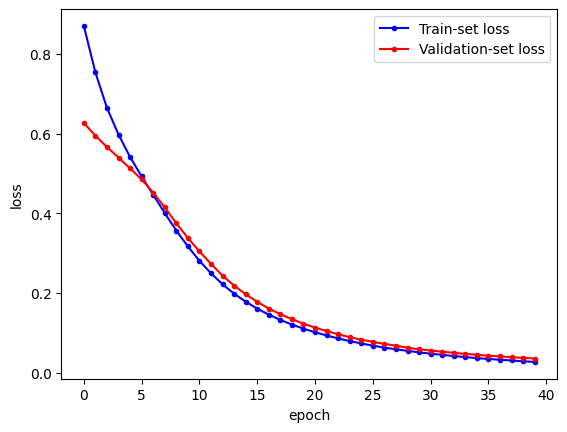

In [ ]:
y_val_loss = history.history['val_loss']

plt.plot(x_len,y_loss, marker='.', c="blue", label='Train-set loss')
plt.plot(x_len,y_val_loss, marker='.', c="red",label='Validation-set loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

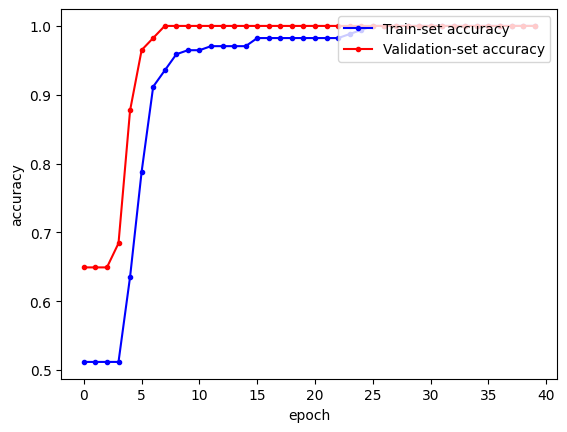

In [ ]:
y_accu = history.history['binary_accuracy']
y_val_accu = history.history['val_binary_accuracy']

plt.plot(x_len,y_accu, marker='.', c="blue", label='Train-set accuracy')
plt.plot(x_len,y_val_accu, marker='.', c="red",label='Validation-set accuracy')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 8ms/step - loss: 1.2252 - binary_accuracy: 0.5395


[1.2252416610717773, 0.5394737124443054]